## loop tries - Denver Delays Worst Airports

##### Imports

In [1]:
import re
import pandas as pd
import numpy as np
from pygeocoder import Geocoder
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

##### Adjust the default display size for the map,
- static code draws the USA, details get filled in later
- run `mUSA = Basemap()` first so it may be embedded in the `get_airport_code()` function 

In [2]:
# set the display size
plt.rcParams["figure.figsize"] = [60, 40]
# set the map range of coordinates to display mUSA
mUSA = Basemap(projection='mill', llcrnrlat = 22.5, llcrnrlon = -128,
               urcrnrlat = 52.0, urcrnrlon = -67, resolution='l')

##### Function `get_airport_code_()` returns 
- airport code
- airport name
- coordinates
- airport name... (a second time)
- ```Basemap()``` float coordinates

In [26]:
def get_airport_code(airport_name):
    """function takes in a loosely typed name of city and or airport and 
    returns the airports' three digit code, full name, and coordinates
    It's good to specify the airport if a city has two, such as Dallas Love Field
    and Dallas Fort Worth """
    g = Geocoder.geocode(airport_name)
    proto_code = g.formatted_address.encode('utf-8')    
#     airport_code = re.search('\(([^)]+)', proto_code).group(1)
#     x_map_coords, y_map_coords = mUSA(g.coordinates[0], g.coordinates[1])
    x_map_coords, y_map_coords = mUSA(g.coordinates[1], g.coordinates[0])

    return [str(g.airport), g.coordinates, str(airport_name), (x_map_coords, y_map_coords)]

example:
```
DCA = get_airport_code('DCA')
DCA

[['DCA'],
 'Ronald Reagan Washington National Airport',
 (38.851242, -77.04023149999999),
 'DCA',
 (18553002.87843292, -13497371.024096765)]```

##### Emergency variable

In [4]:
# in case the google api prevents too many hits per day and doesnt load the codes, 
# here is the emergency variable, which has the get_airport_code() function returning
# var_for emerg = ['ORD', 'ATL', 'LAX', 'DFW', 'DEN', 'CLT', 'LAS', 'IAH', 'SFO', 'PHX']

##### The `lates` variable is brrowed from webscraped page in a different notebook.
right now the list is copied... it would be better to import it from the other notebook

In [5]:
# import stuff here

In [6]:
lates = ["Chicago's O'Hare International",
 "Atlanta's Hartsfield-Jackson International",
 'Los Angeles International',
 'Dallas/Fort Worth International',
 'Denver International',
 'Charlotte Douglas International',
 "Las Vegas' McCarran International",
 "Houston's George Bush Intercontinental",
 'San Francisco International',
 'Phoenix Sky Harbor International']

In [7]:
lates

["Chicago's O'Hare International",
 "Atlanta's Hartsfield-Jackson International",
 'Los Angeles International',
 'Dallas/Fort Worth International',
 'Denver International',
 'Charlotte Douglas International',
 "Las Vegas' McCarran International",
 "Houston's George Bush Intercontinental",
 'San Francisco International',
 'Phoenix Sky Harbor International']

##### transforming the `lates` strings into useful codes
- codes will be used to create variables

In [8]:
# worst_airports = []
# for code_needed in lates:
#     air_code = get_airport_code(code_needed)
#     worst_airports.append(air_code[0])
# worst_airports

In [9]:
# var_for emerg = ['ORD', 'ATL', 'LAX', 'DFW', 'DEN', 'CLT', 'LAS', 'IAH', 'SFO', 'PHX']
worst_airports = ['ORD', 'ATL', 'LAX', 'DFW', 'DEN', 'CLT', 'LAS', 'IAH', 'SFO', 'PHX']

### Get origin coordinates, store them in a list, for use in the `mUSA()` method plots

In [27]:
# get_airport_code('denver airport')
# No need to loop through this one since Denver is the origin
DEN = get_airport_code('DIA')
DEN

['Denver International Airport',
 (39.8560963, -104.6737376),
 'DIA',
 (2593760.815099486, 2135931.09593892)]

In [28]:
DCA = get_airport_code('DCA')
DCA

['Ronald Reagan Washington National Airport',
 (38.851242, -77.04023149999999),
 'DCA',
 (5666465.051933957, 2004907.6332323821)]

In [29]:
DCA[1]

(38.851242, -77.04023149999999)

In [30]:
# Denver airport map coordinates
mUSA(DEN[1][1], DEN[1][0])

(2593760.815099486, 2135931.09593892)

In [31]:
# DC airport map coordinates
mUSA(DCA[1][1], DCA[1][0])

(5666465.051933957, 2004907.6332323821)

In [32]:
# DCA difference
mUSA(DCA[1][1], DCA[1][0])
# >> (5666465.051933957, 2004907.6332323821)



(5666465.051933957, 2004907.6332323821)

In [33]:
ORD = get_airport_code('Ohare')
ORD

["O'Hare International Airport",
 (41.9741625, -87.9073214),
 'Ohare',
 (4458100.356663127, 2415925.8138660314)]

In [34]:
mUSA(ORD[1][1], ORD[1][0])

(4458100.356663127, 2415925.8138660314)

In [15]:
# Denver_1 is x_1, DC_1 is y_1 
# xToDCA

In [16]:
# Denver_2 is x_2, DC_2 is y_2 
# yToDCA

In [35]:
DEN[1]

(39.8560963, -104.6737376)

In [36]:
DEN[3][0]

2593760.815099486

In [37]:
(DEN[3][1])

2135931.09593892

In [38]:
# *****
# Seattle Tacoma International


SEA = get_airport_code('Seattle Tacoma International Airport')
SEA

['Seattle-Tacoma International Airport',
 (47.4502499, -122.3088165),
 'Seattle Tacoma International Airport',
 (632830.4338135512, 3166771.4578792555)]

In [39]:
# *****
# Ronald Reagan International
DCA = get_airport_code('DCA')
DCA

['Ronald Reagan Washington National Airport',
 (38.851242, -77.04023149999999),
 'DCA',
 (5666465.051933957, 2004907.6332323821)]

In [39]:
# xToDCA

In [47]:
# x_DCA

5666465.051933957

In [48]:
# y_DCA

2004907.6332323821

In [40]:
DCA

['Ronald Reagan Washington National Airport',
 (38.851242, -77.04023149999999),
 'DCA',
 (18553002.87843292, -13497371.024096765)]

In [41]:
DEN

['Denver International Airport',
 (39.8560963, -104.6737376),
 'DIA',
 (18664737.525995836, 1e+30)]

In [45]:
# xToDCA

In [44]:
# yToDCA

In [48]:
# # *****
# # Ronald Reagan International
# DCA = get_airport_code('DCA')
# xToDCA = []
# yToDCA = []

# x_DCA, y_DCA = mUSA(DENlon, DENlat)
# xToDCA.append(x_DCA)
# yToDCA.append(y_DCA)

In [49]:
DEN[1]

(39.8560963, -104.6737376)

In [51]:
# DENlon

In [52]:
# DENlat

In [53]:
# mUSA(DENlon, DENlat)

In [54]:
# mUSA(DENlon, DENlat)

In [55]:
# x_DCA

In [56]:
# y_DCA

In [52]:
# xToDCA

[2593760.815099486]

In [53]:
# yToDCA

[2135931.09593892]

In [54]:
# DCAlat, DCAlon = DCA[2]
# x_DCA, y_DCA = mUSA(DCAlon, DCAlat)
# xToDCA.append(x_DCA)
# yToDCA.append(y_DCA)

In [55]:
# DCA[2]

(38.851242, -77.04023149999999)

In [56]:
# x_DCA

5666465.051933957

In [57]:
# y_DCA

2004907.6332323821

In [64]:
# this variable is badly named
# these are the coordinates of denver (the origin), 
# mixed with the destination DCA
# they are returned from eparate calls to the Basemap function
# Call it ORIGIN_to_DEST instead, or just use a constant for the first argument

xToDCA

[2593760.815099486, 5666465.051933957]

In [59]:
yToDCA

[2135931.09593892, 2004907.6332323821]

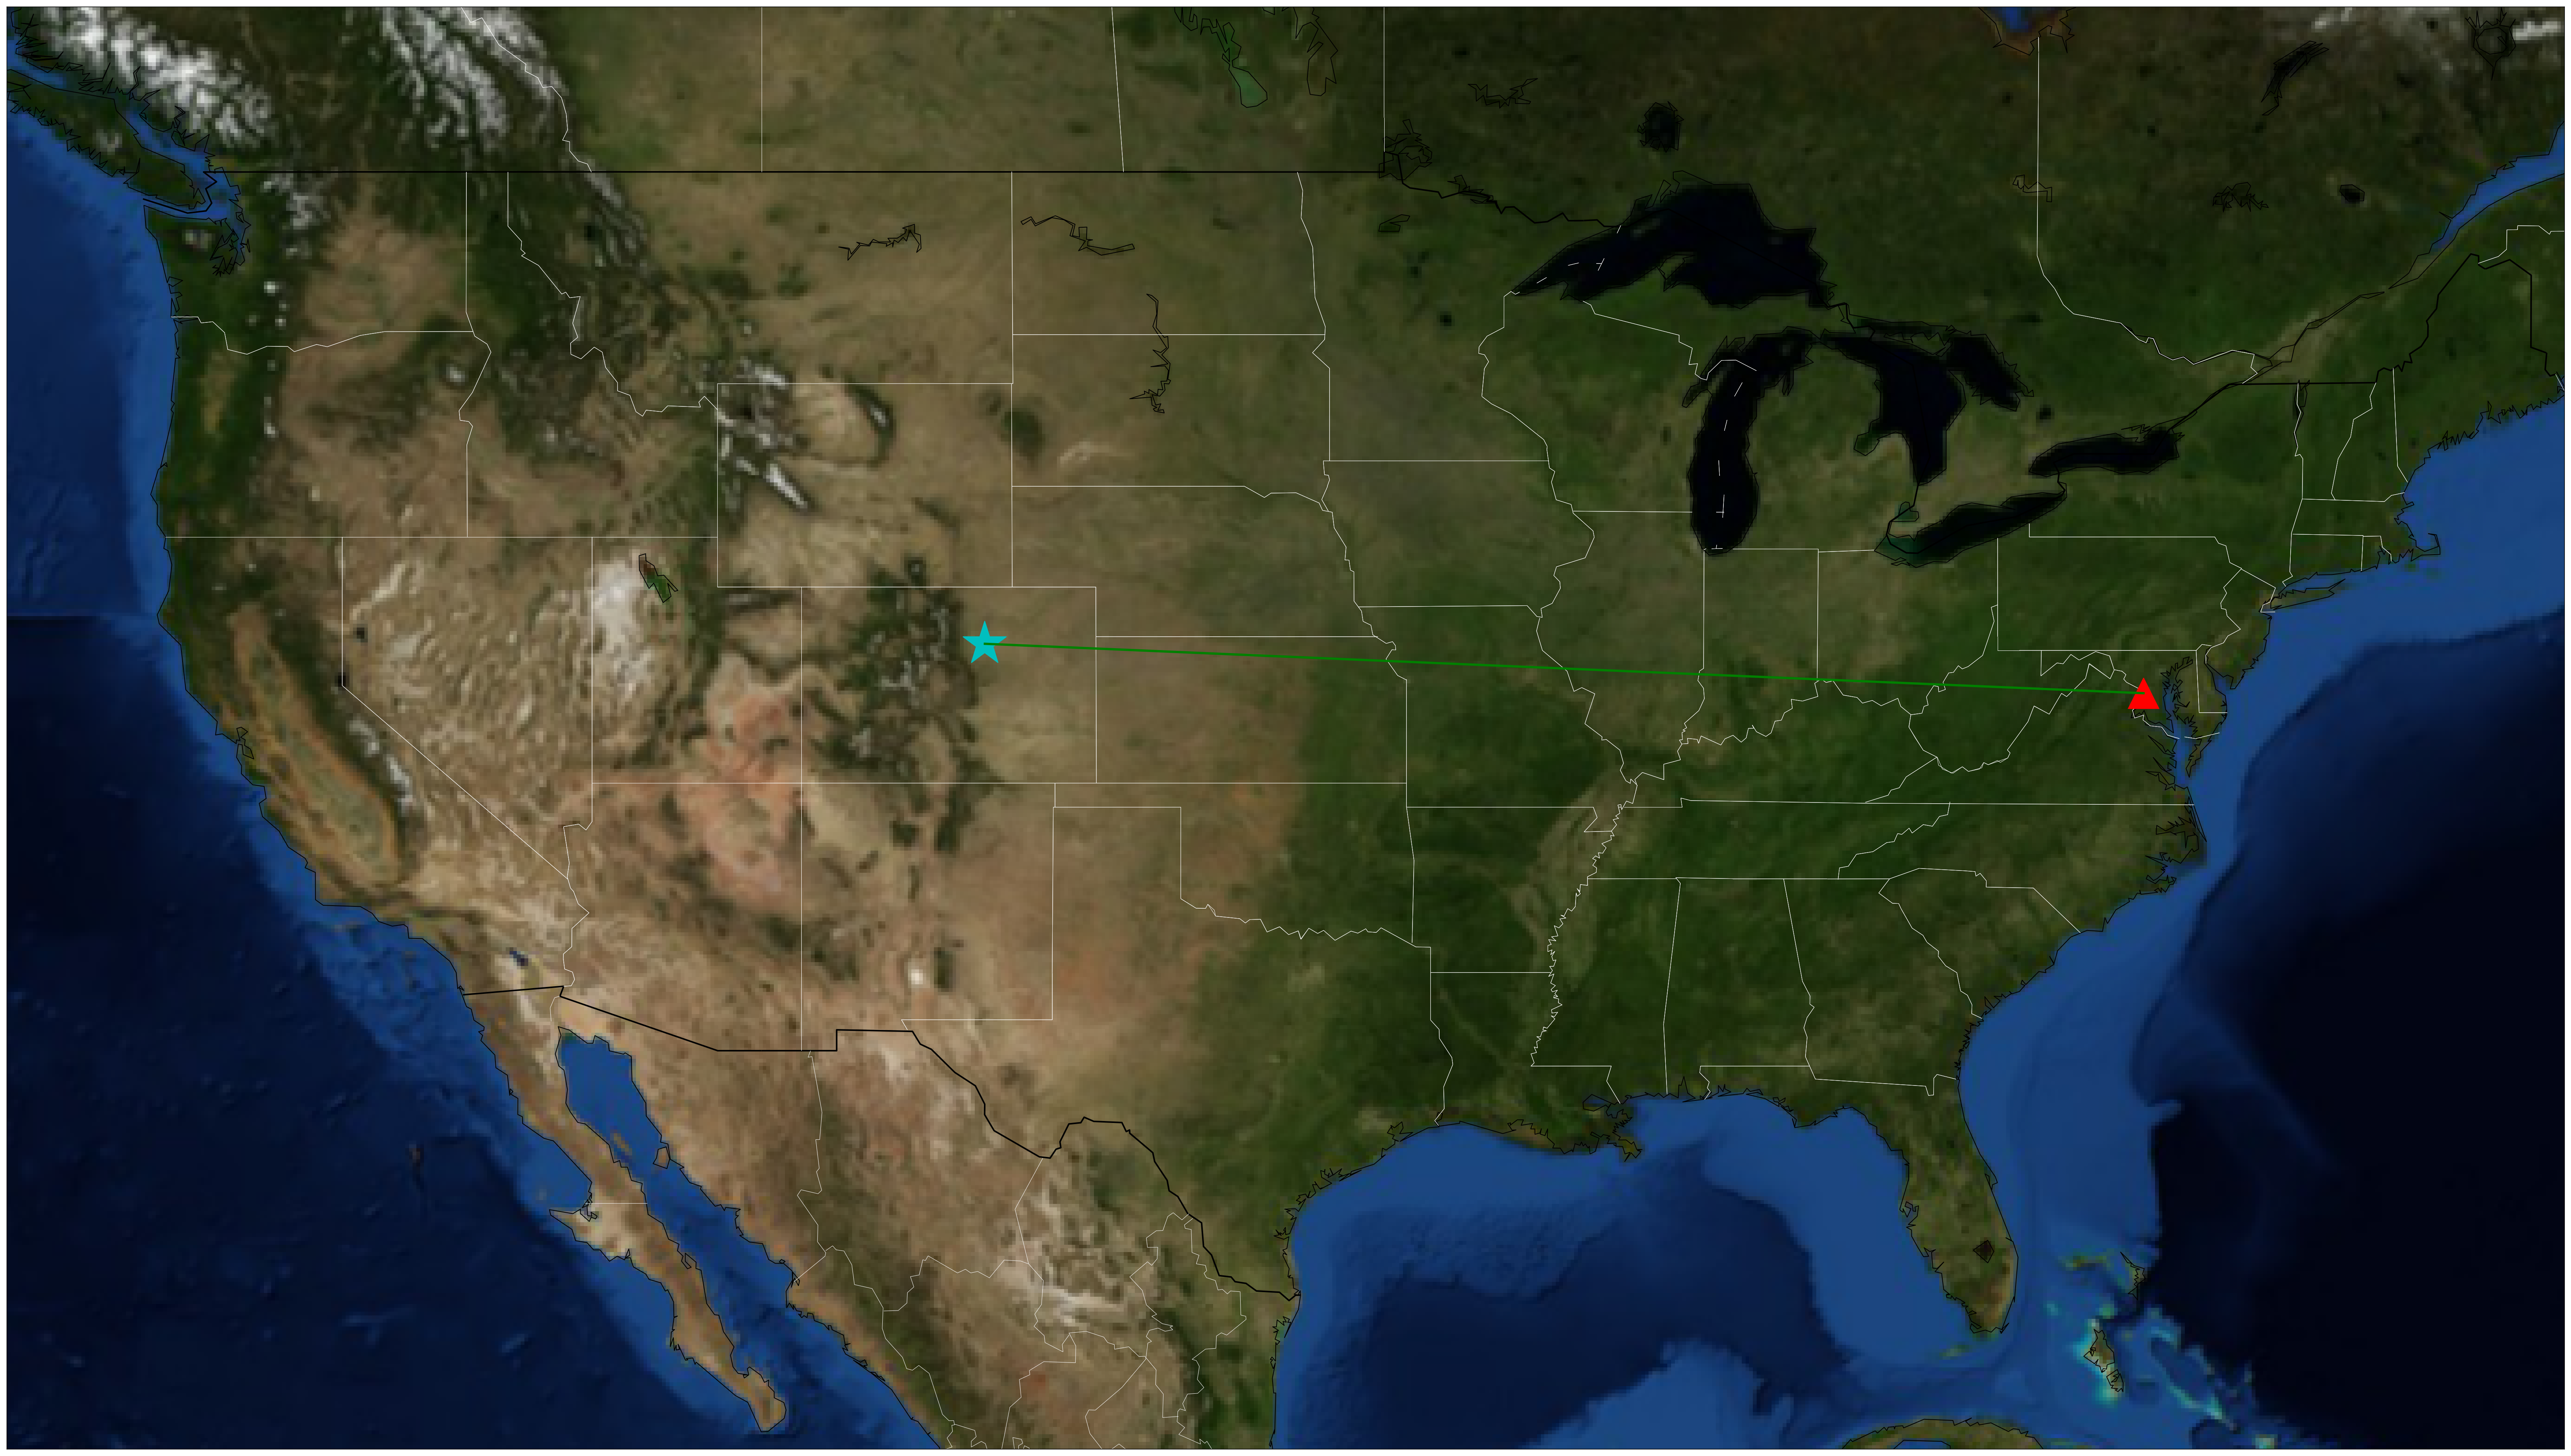

In [86]:
# mark DENVER (origin) with a cyan star
mUSA.plot(2593760.815099486, 2135931.09593892, 'c*', markersize=60)


# mark Ronald Reagan International (destination3 with red triangle. draw line by providing lineplot lists
# plot a location
mUSA.plot(xToDCA[1], yToDCA[1], 'r^', markersize=40)
# plot a line between locations
mUSA.plot(xToDCA, yToDCA, color='g', linewidth=3, label='flight')

# Draw the macro details
mUSA.drawcoastlines()
mUSA.drawcountries(linewidth=2)
mUSA.drawstates(color='w')
mUSA.bluemarble(scale=0.75)
plt.show()
plt.savefig('usa_flights.svg')

In [57]:
# ANY = []

test_list = ['DEN', 'DCA']

# for test_item in test_list:
#     get_airport_code(test_item)

# mark any destination with red triangle. draw line by providing lineplot lists
# plot a location
# mUSA.plot(xToDCA[1], yToDCA[1], 'r^', markersize=40)
# # plot a line between locations
# mUSA.plot(xToDCA, yToDCA, color='g', linewidth=3, label='flight')



In [105]:
list_of_functions = [] #list of functions
test_list2 = ['DEN']
for i in test_list2:
    HHH = get_airport_code(i)
    list_of_functions.append(HHH)

AttributeError: 'NoneType' object has no attribute 'group'

In [ ]:
list_of_functions

In [21]:
from time import sleep

In [22]:
test_catch = []
for _ in worst_airports:
    sleep(.2)
    test_catch.append(get_airport_code(_))
    sleep(12.0)    

In [71]:
test_catch

[["O'Hare International Airport",
  (41.9741625, -87.9073214),
  'ORD',
  (18900255.630831473, -16497961.859723784)],
 ['Hartsfield-Jackson Atlanta International Airport',
  (33.6407282, -84.4277001),
  'ATL',
  (17973620.45148332, -15419992.480920237)],
 ['Los Angeles International Airport',
  (33.9415889, -118.40853),
  'LAX',
  (18007074.619197022, 1e+30)],
 ['Dallas/Fort Worth International Airport',
  (32.8998091, -97.0403352),
  'DFW',
  (17891234.045303702, 1e+30)],
 ['None', (34.0240113, -118.286336), 'DEN', (18016239.56760326, 1e+30)],
 ['Charlotte Douglas International Airport',
  (35.2144026, -80.9473146),
  'CLT',
  (18148604.978556342, -14461822.896333788)]]

In [72]:
test_catch[0][1:4]

[(41.9741625, -87.9073214), 'ORD', (18900255.630831473, -16497961.859723784)]

In [76]:
x_bleep, y_bleep = mUSA(41.9741625, -87.9073214)
x_bleep, y_bleep

(18900255.630831473, -16497961.859723784)

In [80]:
helper = []
helper.append(test_catch[0][1:4])
helper.append(test_catch[1][1:4])
helper.append(test_catch[2][1:4])
helper

[[(41.9741625, -87.9073214), 'ORD', (18900255.630831473, -16497961.859723784)],
 [(33.6407282, -84.4277001), 'ATL', (17973620.45148332, -15419992.480920237)],
 [(33.9415889, -118.40853), 'LAX', (18007074.619197022, 1e+30)]]

In [96]:
for qx in helper[0][0]:
    type(qx[0], qx[1])

TypeError: 'float' object has no attribute '__getitem__'

In [86]:
mUSA()

TypeError: a float is required